# IMPORT LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# READ DATASET

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
# checking the distribution of Target Variable
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# Target 
1 --> Defective Heart

0 --> Healthy Heart

In [4]:
# number of rows and columns in the dataset
df.shape


(1025, 14)

# DATA VISUALIZATION

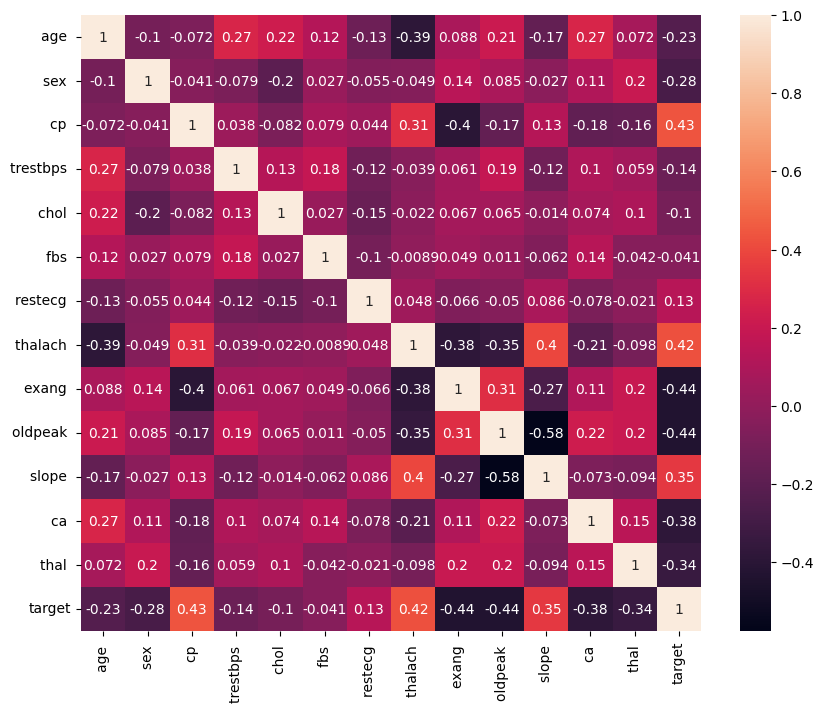

In [5]:
# Plot a heatmap to visualize the relationship between the features and the target
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# DATA PREPROCESSING

In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [7]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   sex        1025 non-null   int64  
 2   cp         1025 non-null   int64  
 3   trestbps   1025 non-null   int64  
 4   chol       1025 non-null   int64  
 5   fbs        1025 non-null   int64  
 6   restecg    1025 non-null   int64  
 7   thalach    1025 non-null   int64  
 8   exang      1025 non-null   int64  
 9   oldpeak    1025 non-null   float64
 10  slope      1025 non-null   int64  
 11  ca         1025 non-null   int64  
 12  thal       1025 non-null   int64  
 13  target     1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# statistical measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Split the dataset into train and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [10]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# BUILD MODEL & PARAMETER TUNING

## Train Random Forest Classifier 

In [11]:
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}
rf_grid_search = GridSearchCV(rf, rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

## Train Logistic Regression Classifier 

In [12]:
lr = LogisticRegression(random_state=42, penalty='l2', solver='lbfgs')
lr_params = {'C': [0.1, 1, 10]}
lr_grid_search = GridSearchCV(lr, lr_params, cv=5)
lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10]})

## Train Artificial Neural Network Classifier 

In [13]:
# Train an Artificial Neural Network classifier
ann = MLPClassifier(solver='lbfgs', max_iter=1000, random_state=42)
ann_params = {'hidden_layer_sizes': [(10,), (50,), (100,)], 'alpha': [0.01, 0.001, 0.0001]}
ann_grid_search = GridSearchCV(ann, ann_params, cv=5)
ann_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=MLPClassifier(max_iter=1000, random_state=42,
                                     solver='lbfgs'),
             param_grid={'alpha': [0.01, 0.001, 0.0001],
                         'hidden_layer_sizes': [(10,), (50,), (100,)]})

In [14]:
# Evaluate the model with cross-validation
ann_scores = cross_val_score(ann_grid_search, X_train, y_train, cv=5)

# MAKE PREDICTIONS ON TEST SET

In [15]:
rf_y_pred = ann_grid_search.predict(X_test)
ann_y_pred = ann_grid_search.predict(X_test)
lr_y_pred = lr_grid_search.predict(X_test)


In [16]:
input_data = (  47 ,  1 , 2 ,     138 , 257 ,  0 ,      0 ,    156 ,    0 ,    0   ,    2 , 0 ,   2  )
# change input data to numpy  array 
input_data_as_numpyarray = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpyarray.reshape(1,-1)

prediction = rf_grid_search.predict(input_data_reshaped)
print(prediction)

if (prediction [0]== 0 ):
    print("Low risk of Heart Disease")
else:
    print("High risk of Heart Disease")

[1]
High risk of Heart Disease


# EVALUATE THE MODELS 

In [17]:
rf_acc = accuracy_score(y_test, rf_y_pred)
ann_acc = accuracy_score(y_test, ann_y_pred)
lr_acc = accuracy_score(y_test, lr_y_pred)

rf_report = classification_report(y_test, rf_y_pred)
ann_report = classification_report(y_test, ann_y_pred)
lr_report = classification_report(y_test, lr_y_pred)

In [18]:
# Add confusion matrix, sensitivity and specificity
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_sensitivity = rf_cm[0,0]/(rf_cm[0,0]+rf_cm[0,1])
rf_specificity = rf_cm[1,1]/(rf_cm[1,0]+rf_cm[1,1])

ann_cm = confusion_matrix(y_test, ann_y_pred)
ann_sensitivity = ann_cm[0,0]/(ann_cm[0,0]+ann_cm[0,1])
ann_specificity = ann_cm[1,1]/(ann_cm[1,0]+ann_cm[1,1])

lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_sensitivity = lr_cm[0,0]/(lr_cm[0,0]+lr_cm[0,1])
lr_specificity = lr_cm[1,1]/(lr_cm[1,0]+lr_cm[1,1])

# PRINT THE RESULTS 

In [19]:
print("Random Forest Accuracy:", rf_acc)
print("Random Forest Sensitivity:", rf_sensitivity)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest Classification Report:")
print(rf_report)
print()

Random Forest Accuracy: 0.9853658536585366
Random Forest Sensitivity: 1.0
Random Forest Specificity: 0.970873786407767
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205




In [20]:
print("Artificial Neural Network Accuracy:", ann_acc)
print("Artificial Neural Network Sensitivity:", ann_sensitivity)
print("Artificial Neural Network Specificity:", ann_specificity)
print("Artificial Neural Network Classification Report:")
print(ann_report)
print()

Artificial Neural Network Accuracy: 0.9853658536585366
Artificial Neural Network Sensitivity: 1.0
Artificial Neural Network Specificity: 0.970873786407767
Artificial Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205




In [21]:
print("Logistic Regression Accuracy:", lr_acc)
print("Logistic Regression Sensitivity:", lr_sensitivity)
print("Logistic Regression Specificity:", lr_specificity)
print("Logistic Regression Classification Report:")
print(lr_report)

Logistic Regression Accuracy: 0.7951219512195122
Logistic Regression Sensitivity: 0.7156862745098039
Logistic Regression Specificity: 0.8737864077669902
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [22]:
# Save the artificial neural network model
joblib.dump(ann_grid_search, 'ann_model.joblib')


['ann_model.joblib']

In [23]:
# Save the random forest model
joblib.dump(rf_grid_search, 'rf_model.joblib')

['rf_model.joblib']

In [24]:
# Save the logistic regression model
joblib.dump(lr_grid_search, 'lr_model.joblib')

['lr_model.joblib']